In [6]:
import nibabel as nb

coords_lh, faces_lh = nb.freesurfer.io.read_geometry("/home/s17gmikh/FCD-Detection/meld_graph/data/output/fs_outputs/fsaverage_sym/surf/lh.sphere")
coords_rh, faces_rh = nb.freesurfer.io.read_geometry("/home/s17gmikh/FCD-Detection/meld_graph/data/output/fs_outputs/fsaverage_sym/surf/lh.sphere")

print("LH vertices:", coords_lh.shape[0])
print("RH vertices:", coords_rh.shape[0])
print("Total:", coords_lh.shape[0] + coords_rh.shape[0])

LH vertices: 163842
RH vertices: 163842
Total: 327684


In [7]:
import h5py

with h5py.File('/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00001_featurematrix.hdf5', 'r') as f:
    # Посмотреть всё дерево
    def print_tree(name): print(name)
    f.visit(print_tree)

    # Пример: загрузить маску коры
    cortex_mask = f['BONN/XT/patient/sub-00001/labels/cortex_mask'][:]
    print(cortex_mask.shape, cortex_mask.dtype)

    # Или lesion mask (если она есть)
    lesion_mask = f['BONN/XT/patient/sub-00001/labels/lesion_mask'][:]


BONN
BONN/XT
BONN/XT/patient
BONN/XT/patient/sub-00001
BONN/XT/patient/sub-00001/lh
BONN/XT/patient/sub-00001/lh/.on_lh.curv.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.25.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.5.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.75.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.pial.K_filtered.sm20.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.sulc.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.thickness.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.w-g.pct.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.wm_FLAIR_0.5.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.wm_FLAIR_1.mgh
BONN/XT/patient/sub-00001/rh
BONN/XT/patient/sub-00001/rh/.on_lh.curv.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.gm_FLAIR_0.25.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.gm_FLAIR_0.5.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.gm_FLAIR_0.75.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.gm_FLAIR_0.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.pial.K_filtered.sm20.mgh
BONN

KeyError: 'Unable to open object (component not found)'

In [5]:
import os
import pandas as pd

# Путь к папке с .hdf5
folder = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data"
output_folder = "/home/s17gmikh/FCD-Detection/meld_graph/data"
output_file = "subjects_list.csv"

# Список файлов
filenames = os.listdir(folder)

# Извлечь ID до "_"
subject_ids = sorted(set(
    name.split('_')[0]
    for name in filenames
    if name.endswith(".hdf5")
))

# Создать DataFrame и сохранить в CSV
df = pd.DataFrame(subject_ids, columns=["ID"])
df.to_csv(os.path.join(output_folder, output_file), index=False)

print(f"✅ Saved {len(subject_ids)} subject IDs to {output_file}")


✅ Saved 20 subject IDs to subjects_list.csv


In [25]:
import h5py
import os
import shutil

folder = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data"
files = [f for f in os.listdir(folder) if f.endswith("_featurematrix.hdf5")]

for filename in files:
    subj_id = filename.split('_')[0]
    path_in = os.path.join(folder, filename)
    path_tmp = os.path.join(folder, f"tmp_{filename}")

    try:
        with h5py.File(path_in, 'r') as f_in:
            with h5py.File(path_tmp, 'w') as f_out:
                src_group = "BONN/XT/patient/{subj_id}"
                dst_group = f"BONN/XT/patient/{subj_id}"
                f_in.copy(src_group, f_out, name=dst_group)
        # Если всё прошло успешно — заменяем старый файл новым
        os.replace(path_tmp, path_in)
        print(f"✅ {filename}: group renamed to noHarmo")
    except Exception as e:
        print(f"❌ {filename}: {e}")
        if os.path.exists(path_tmp):
            os.remove(path_tmp)


✅ sub-00032_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00146_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00145_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00144_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00142_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00010_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00009_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00004_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00006_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00003_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00001_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00014_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00015_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00140_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00141_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00016_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00018_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00020_featurematrix.hdf5:

In [22]:
import h5py

path = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00024_featurematrix.hdf5"

with h5py.File(path, 'r') as f:
    print("Top-level groups in file:")
    for key in f.keys():
        print(" -", key)


Top-level groups in file:
 - BONN


In [2]:
import h5py
with h5py.File('/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00146_featurematrix_combat.hdf5', 'r') as f:
    # Посмотреть всё дерево
    def print_tree(name): print(name)
    f.visit(print_tree)

    # # Пример: загрузить маску коры
    # cortex_mask = f['BONN/XT/patient/sub-00001/labels/cortex_mask'][:]
    # print(cortex_mask.shape, cortex_mask.dtype)

    # # Или lesion mask (если она есть)
    # lesion_mask = f['BONN/XT/patient/sub-00001/labels/lesion_mask'][:]


sub-00146
sub-00146/XT
sub-00146/XT/patient
sub-00146/XT/patient/sub-00146
sub-00146/XT/patient/sub-00146/lh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.curv.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.gm_FLAIR_0.25.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.gm_FLAIR_0.5.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.gm_FLAIR_0.75.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.gm_FLAIR_0.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.pial.K_filtered.sm20.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.sulc.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.thickness.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.thickness_regression.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.w-g.pct.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.wm_FLAIR_0.5.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.wm_FLAIR_1.sm3.mgh
sub-00146/XT/patient/sub-00146/rh
sub-00146/XT/patient/sub-00146/rh/.combat.o

In [18]:
import os
import shutil

# Путь к папке с подпапками
base_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data"

# Получаем список всех подпапок
folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    old_file = os.path.join(folder_path, "noHarmo_featurematrix.hdf5")
    new_file = os.path.join(base_path, f"{folder}_featurematrix.hdf5")
    
    if os.path.exists(old_file):
        shutil.move(old_file, new_file)
        print(f"✅ Перемещено: {old_file} → {new_file}")
    else:
        print(f"⚠️ Файл не найден: {old_file}")


⚠️ Файл не найден: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/MELD_noHarmo/noHarmo_featurematrix.hdf5
✅ Перемещено: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00032/noHarmo_featurematrix.hdf5 → /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00032_featurematrix.hdf5
✅ Перемещено: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00146/noHarmo_featurematrix.hdf5 → /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00146_featurematrix.hdf5
✅ Перемещено: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00145/noHarmo_featurematrix.hdf5 → /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00145_featurematrix.hdf5
✅ Перемещено: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00144/noHarmo_featurematrix.hdf5 → /home/s17gmikh/FCD-Detection/meld_graph/da

/home/s17gmikh/miniconda3/envs/MELD-env/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


(280, 160, 256, 256)


DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

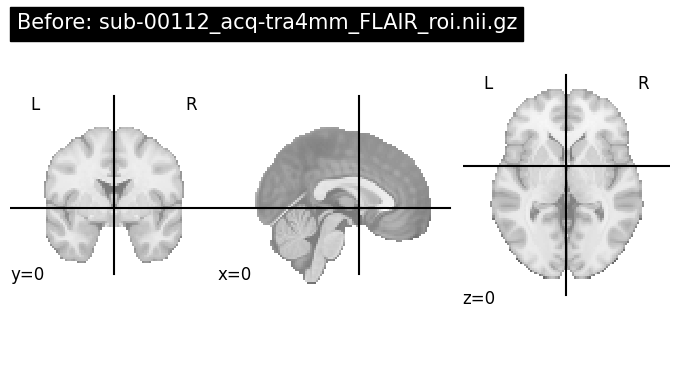

In [12]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
from monai.transforms import LoadImaged, Resized, EnsureTyped, Compose
from monai.data import Dataset

root_dir = "/home/s17gmikh/FCD-Detection/meld_graph/data/preprocessed"
target_shape = (160, 256, 256)

transforms = Compose([
    LoadImaged(keys=["roi"]),
    Resized(keys=["roi"], spatial_size=target_shape, mode="nearest"),
    EnsureTyped(keys=["roi"]),
])

samples_to_show = []

for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith("FLAIR_roi.nii.gz"):
            full_path = os.path.join(root, file)
            try:
                img = nib.load(full_path)
                if img.shape != target_shape:
                    samples_to_show.append(full_path)
            except Exception:
                continue

samples_to_show = samples_to_show[:3]

for path in samples_to_show:
    # Оригинал
    orig_img = nib.load(path)
    plotting.plot_roi(orig_img, title=f"Before: {os.path.basename(path)}", cut_coords=(0, 0, 0))

    # После трансформации
    ds = Dataset(data=[{"roi": path}], transform=transforms)
    resized_array = ds[0]["roi"].squeeze().cpu().numpy()
    affine = orig_img.affine
    resized_img = nib.Nifti1Image(resized_array, affine=affine)
    print(resized_img.shape)
    plotting.plot_roi(resized_img, title=f"After resize: {os.path.basename(path)}", cut_coords=(0, 0, 0))


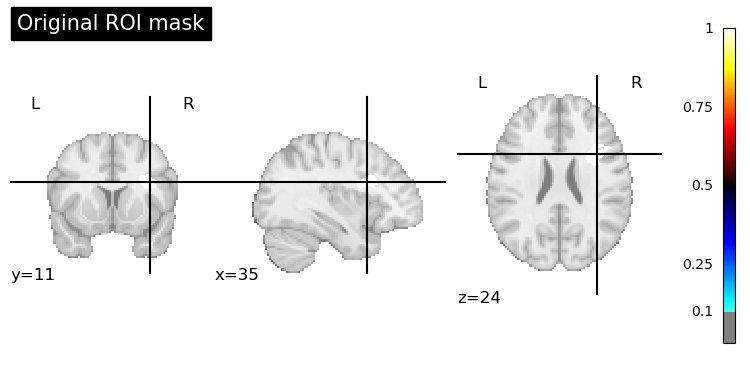

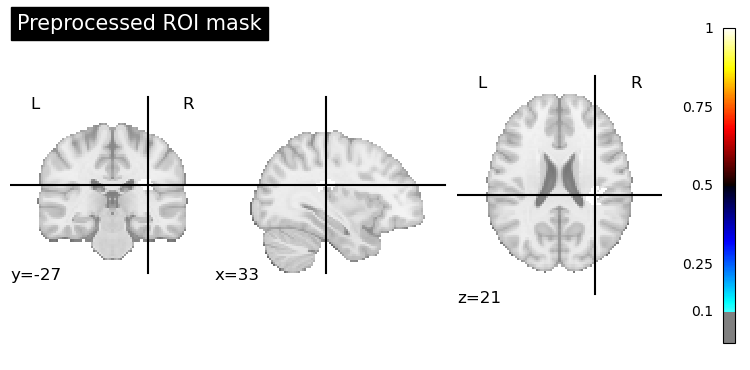

In [15]:
from nilearn.plotting import plot_stat_map

# plot_stat_map(pred_img, title="Prediction", threshold=0.1)
plot_stat_map('/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-T2sel_FLAIR_roi.nii.gz', title="Original ROI mask", threshold=0.1)
plot_stat_map('/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/preprocessed/final_sub-00001_roi_in_atlas.nii.gz', title="Preprocessed ROI mask", threshold=0.1)


ROI center (world coords): [-0.16225147 26.65304548 13.97321558  1.        ]
T1 center (world coords): [-0.25531632 26.47937644 13.74701285  1.        ]
FLAIR center (world coords): [-0.16227055 26.65305984 13.97321677  1.        ]
[get_dataset_dir] Dataset found in /home/s17gmikh/nilearn_data/icbm152_2009


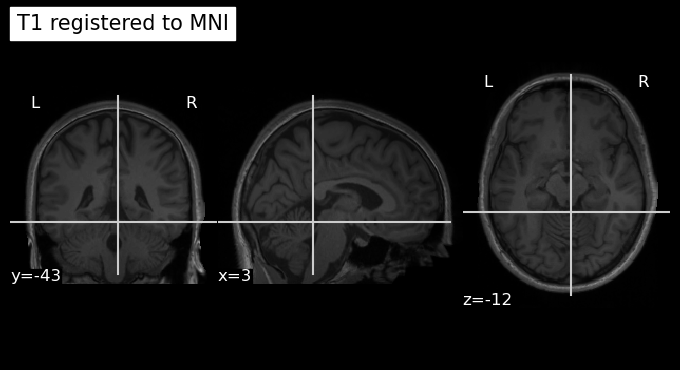

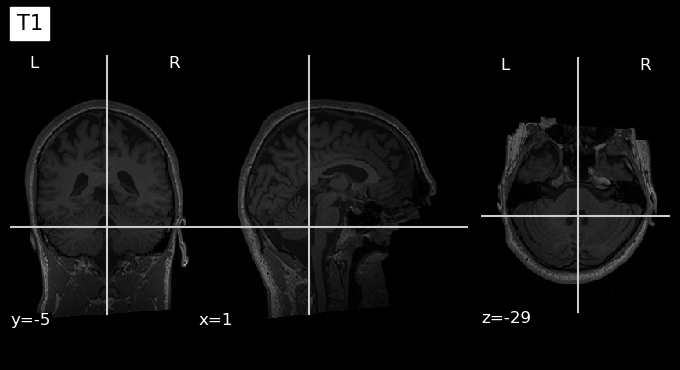

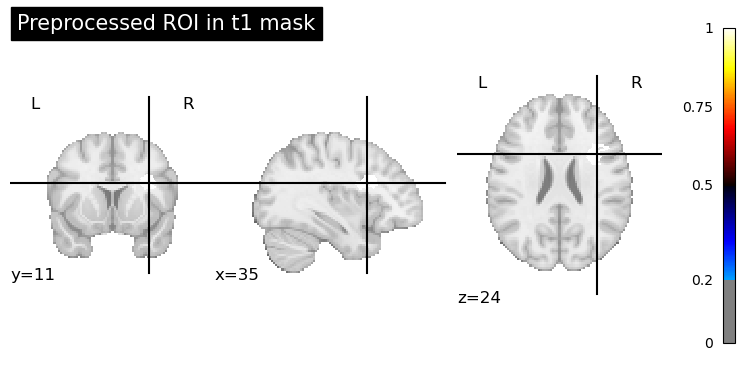

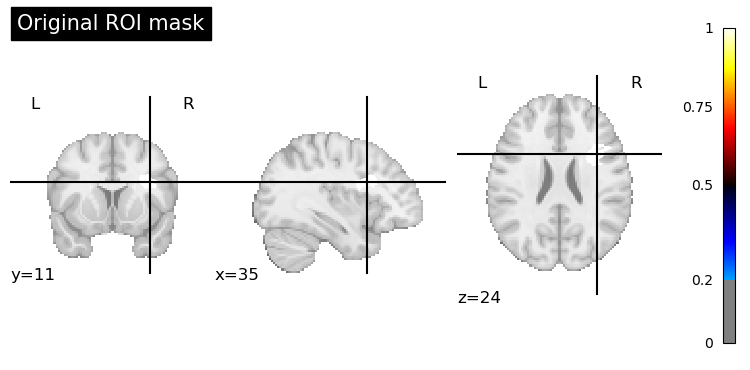

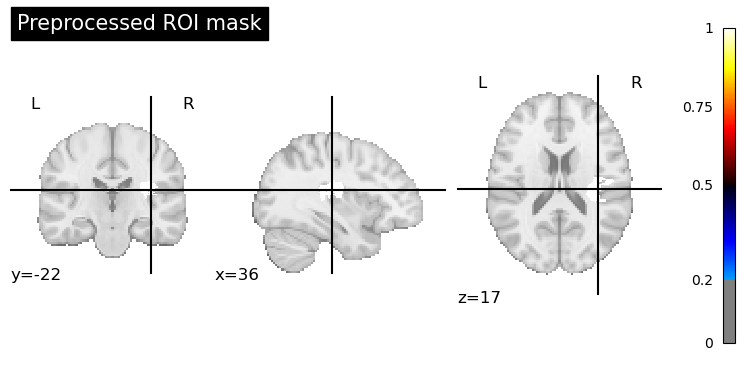

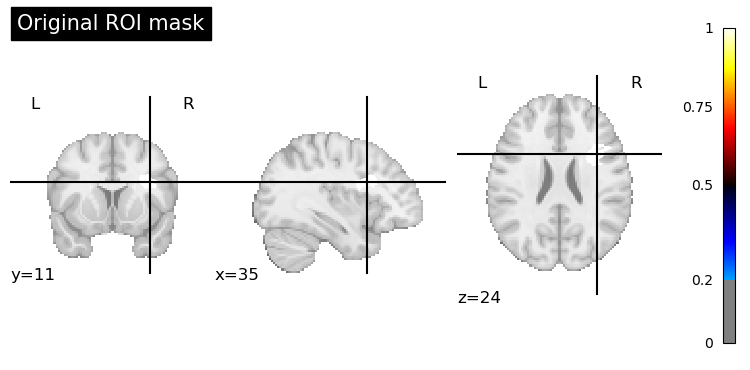

In [ ]:
import matplotlib.pyplot as plt
from nilearn.image import resample_to_img
import nibabel as nib
from nilearn import plotting
import ants
from nilearn.plotting import plot_stat_map

# from nilearn.datasets import load_mni152_template
# template = load_mni152_template(resolution=1)
# template.to_filename("mni152_nilearn_1mm.nii.gz")

t1_path    = "/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-iso08_T1w.nii.gz"
flair_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-T2sel_FLAIR.nii.gz"
# mni_path = "mni152_nilearn_1mm.nii.gz" #"/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/generated/atlas_tmp.nii.gz"
roi_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-T2sel_FLAIR_roi.nii.gz"

# import nibabel as nib
# print("FLAIR affine: \n", nib.load(flair_path).affine.shape)
# print("FLAIR ROI affine:\n", nib.load(roi_path).affine.shape)
# print("T1 affine:\n", nib.load(t1_path).affine.shape)
# print("MNI affine:\n", nib.load(mni_path).affine)

def get_center(img):
    shape = np.array(img.shape)
    affine = img.affine
    center_voxel = shape / 2
    center_world = affine @ np.append(center_voxel, 1)
    return center_world

print("ROI center (world coords):", get_center(nib.load(roi_path)))
print("T1 center (world coords):", get_center(nib.load(t1_path)))
print("FLAIR center (world coords):", get_center(nib.load(flair_path)))

# roi_img_nib = nib.load(roi_path)
# t1_img_nib  = nib.load(t1_path)

# t1_resampled = resample_to_img(t1_img_nib, roi_img_nib, interpolation='nearest')  # или 'nearest' если это маска
# t1_resampled.to_filename("t1_resampled_to_roi.nii.gz")

import ants
import numpy as np

from nilearn.datasets import fetch_icbm152_2009
icbm = fetch_icbm152_2009()
mni_path = icbm.t1
mni_img = ants.image_read(mni_path, reorient=("R", "A", "S"))

# Загружаем
t1_img_base = ants.image_read(t1_path, reorient=("R", "A", "S"))
flair_img = ants.image_read(flair_path, reorient=("R", "A", "S"))
roi_img = ants.image_read(roi_path, reorient=("R", "A", "S"))

t1_img = ants.resample_image_to_target(t1_img_base, roi_img, interpolator='linear')

# t1_resampled = ants.resample_image_to_target(t1_img, roi_img, use_voxels=False)
# roi_resampled = ants.resample_image_to_target(roi_img, mni_img, use_voxels=False, 
#                                    interpolator='nearestNeighbor')  # для ROI!

# Registration: FLAIR → T1, T1 → MNI
reg_flair2t1 = ants.registration(fixed=t1_img, moving=flair_img, type_of_transform='SyN')

reg_t1_to_mni = ants.registration(
    fixed=mni_img,
    moving=t1_img,
    type_of_transform='SyN',
)


# t1_in_mni = ants.apply_transforms(
#     fixed=mni_img,
#     moving=t1_img,
#     transformlist=reg_t1_to_mni['fwdtransforms'],
#     interpolator='linear'
# )
# ants.image_write(t1_in_mni, "t1_in_mni.nii.gz")
# plotting.plot_anat("t1_in_mni.nii.gz", title="T1 registered to MNI")
# plotting.plot_anat(t1_path, title="T1")


# # Приводим ROI к бинарной маске (если вдруг не была)
# roi_bin = roi_img.clone()
# # roi_bin[roi_bin.numpy() > 0] = 1


# Применяем ко всей маске
roi_in_t1 = ants.apply_transforms(
    fixed=t1_img,
    moving=roi_img,
    transformlist=reg_flair2t1['fwdtransforms'],
    interpolator='nearestNeighbor'
)

ants.image_write(roi_in_t1, 'roi_in_t1_final_fixed.nii.gz')

plot_stat_map('roi_in_t1_final_fixed.nii.gz', title="Preprocessed ROI in t1 mask", threshold=0.2)
plot_stat_map('/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-T2sel_FLAIR_roi.nii.gz', title="Original ROI mask", threshold=0.2)

roi_in_mni = ants.apply_transforms(
    fixed=mni_img,
    moving=roi_in_t1,
    transformlist=reg_t1_to_mni['fwdtransforms'],
    interpolator='nearestNeighbor'
)

from nilearn.plotting import plot_roi

ants.image_write(roi_in_mni, 'roi_in_mni_final_fixed.nii.gz')
# plot_roi('roi_in_mni_final.nii.gz', bg_img=mni_path, title="ROI in MNI", display_mode='ortho', threshold=0.2)
plot_stat_map('roi_in_mni_final_fixed.nii.gz', title="Preprocessed ROI mask", threshold=0.2)
plot_stat_map('/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-T2sel_FLAIR_roi.nii.gz', title="Original ROI mask", threshold=0.2)
# # atlas_img = ants.image_read(atlas_tmp_path)
# from nilearn import datasets
# from nilearn.image import resample_to_img
# import ants

# # Загрузка MNI152 T1 шаблона
# mni_template = datasets.load_mni152_template(resolution=2)  # можно resolution=2 для 2mm³

# # Сохраняем как .nii.gz (если нужно для ANTs)
# mni_path = 'mni152_template.nii.gz'
# mni_template.to_filename(mni_path)

# fixed_img = ants.image_read(mni_path)
# t1_img = ants.image_read(t1_path)
# flair_img = ants.image_read(flair_path)
# roi_img = ants.image_read(roi_path)

# print(roi_img.direction)
# print(t1_img.direction)
# print(fixed_img.direction)

# reg_flair2t1 = ants.registration(fixed=t1_img, moving=flair_img, type_of_transform='SyN')
# reg_t1_to_mni = ants.registration(fixed=fixed_img, moving=t1_img, type_of_transform='SyN')

# flair_to_mni = reg_flair2t1['fwdtransforms'] + reg_t1_to_mni['fwdtransforms']

# roi_in_t1 = ants.apply_transforms(fixed=fixed_img, moving=roi_img,
#                                   transformlist=flair_to_mni,
#                                   interpolator='nearestNeighbor')
# reg = ants.registration(fixed=fixed_img, moving=t1_img, type_of_transform='SyN')
# t1_in_template = ants.apply_transforms(fixed=fixed_img,  # T1
#                                      moving=t1_img,
#                                      transformlist=reg['fwdtransforms'],
#                                      interpolator='linear')
# ants.image_write(t1_in_template, 't1_warped_to_template.nii.gz')

# ants.image_write(roi_in_t1, 'roi_in_mni_final.nii.gz')
# plotting.plot_anat(t1_path, title="T1 (moving)", display_mode='ortho')
# plotting.plot_anat('roi_in_mni_final.nii.gz', title="Atlas (fixed)", display_mode='ortho')

In [ ]:
import ants
from nilearn import plotting
import nibabel as nib
import numpy as np

# Загрузка данных
t1_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-iso08_T1w.nii.gz"
roi_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-T2sel_FLAIR_roi.nii.gz"

# Загрузка MNI шаблона
from nilearn.datasets import fetch_icbm152_2009
icbm = fetch_icbm152_2009()
mni_img = ants.image_read(icbm.t1, reorient=("R", "A", "S"))

# Загрузка и подготовка изображений
t1_img = ants.image_read(t1_path, reorient=("R", "A", "S"))
roi_img = ants.image_read(roi_path, reorient=("R", "A", "S"))
roi_bin = ants.threshold_image(roi_img, 0, 0, 0, 1)  # Бинаризация

# Регистрация
reg_affine = ants.registration(
    fixed=mni_img,
    moving=t1_img,
    type_of_transform='AffineFast',
    aff_metric='mattes',
    aff_sampling=16,
    reg_iterations=(20, 10, 0)
)

reg_syn = ants.registration(
    fixed=mni_img,
    moving=t1_img,
    type_of_transform='SyN',
    initial_transform=reg_affine['fwdtransforms'],
    syn_metric='CC',
    syn_sampling=2,
    reg_iterations=(30, 10, 0)
)

# Применение преобразований и сохранение в NIfTI
roi_in_mni = ants.apply_transforms(
    fixed=mni_img,
    moving=roi_bin,
    transformlist=reg_syn['fwdtransforms'],
    interpolator='nearestNeighbor'
)

# Конвертация ANTs → nibabel
roi_in_mni_nii = nib.Nifti1Image(roi_in_mni.numpy(), affine=roi_in_mni.origin_space.affine)
mni_nii = nib.Nifti1Image(mni_img.numpy(), affine=mni_img.origin_space.affine)

# Визуализация
plotting.plot_roi(
    roi_img=roi_in_mni_nii,
    bg_img=mni_nii,
    title="ROI in MNI (Fast)",
    display_mode='ortho',
    cut_coords=(-44, 3, -13),
    threshold=0.5
)

NameError: name 'reg_t1_to_mni' is not defined

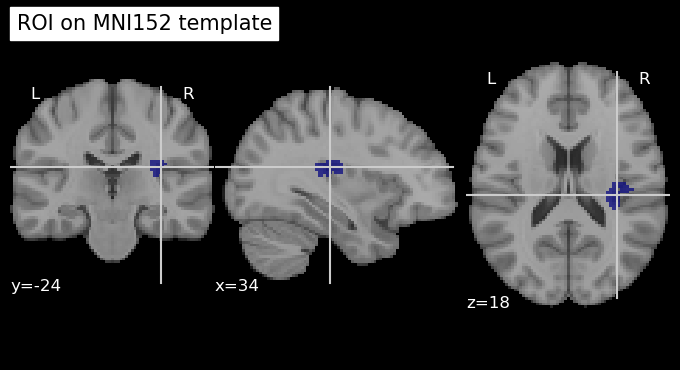

In [3]:
import numpy as np
# roi_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-T2sel_FLAIR_roi.nii.gz"
# roi_img = ants.image_read(roi_path)
roi_img = roi_in_t1
# Z-score mask
z_value = np.max(fixed_img.numpy())
roi_data = roi_img.numpy()
roi_data = (roi_data > 0).astype(np.float32) * z_value
roi_zmap = ants.from_numpy(roi_data, origin=roi_img.origin, spacing=roi_img.spacing, direction=roi_img.direction)

# Warp ROI
warped_roi = ants.apply_transforms(
    fixed=fixed_img,  # шаблон MNI
    moving=roi_zmap,
    transformlist=reg_t1_to_mni['fwdtransforms'],
    interpolator='nearestNeighbor'
)
ants.image_write(warped_roi, 'roi_to_mni.nii.gz')
plotting.plot_roi('roi_to_mni.nii.gz', bg_img=mni_path, title='ROI on MNI152 template')

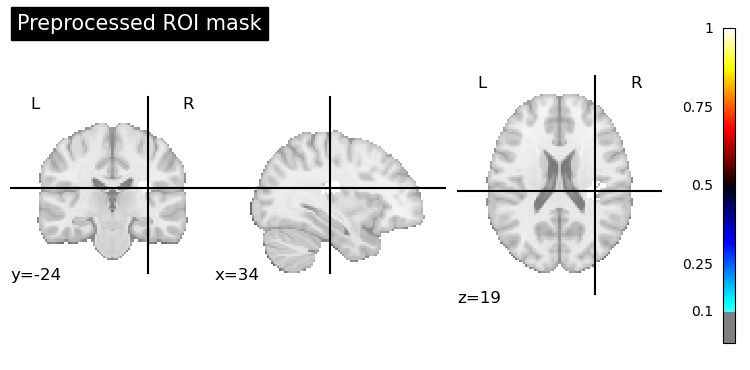

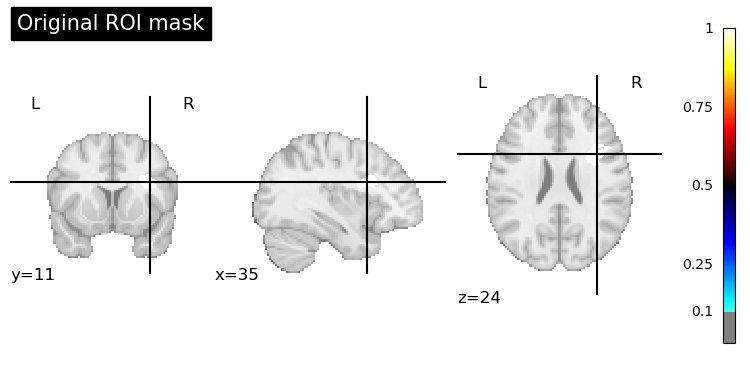

In [8]:
from nilearn.plotting import plot_stat_map
# plotting.plot_roi('roi_warped_to_atlas.nii.gz', bg_img=atlas_tmp_path, title='ROI over Atlas')
plot_stat_map('roi_in_mni_final.nii.gz', title="Preprocessed ROI mask", threshold=0.1)
plot_stat_map('/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00001/anat/sub-00001_acq-T2sel_FLAIR_roi.nii.gz', title="Original ROI mask", threshold=0.1)
# from scipy.ndimage import center_of_mass

# print("Center original:", center_of_mass(nib.load(roi_path).get_fdata()))
# print("Center warped:", center_of_mass(warped_roi.numpy()))


In [13]:
print(np.allclose(pred_img.affine, roi_img.affine))  # → True?
print(pred_data.shape, roi_data.shape)  # → должны совпадать

import numpy as np

# Бинаризуем (если это вероятности, а не маски)
pred_mask = pred_data > 0.5  # или просто >0 если уже маска
roi_mask = roi_data > 0

# IoU (intersection over union)
intersection = np.logical_and(pred_mask, roi_mask).sum()
union = np.logical_or(pred_mask, roi_mask).sum()
iou = intersection / union if union != 0 else 0

# Dice coefficient
dice = (2 * intersection) / (pred_mask.sum() + roi_mask.sum())

print(f"IoU: {iou:.3f}")
print(f"Dice: {dice:.3f}")


True
(91, 109, 91) (91, 109, 91)
IoU: 0.000
Dice: 0.000


In [13]:
import os
import json

root_dir = 'data/input/ds004199'  # укажи абсолютный или относительный путь

manufacturers = set()
seriesDescriptions = set()
protocolNames = set()
json_files_found = 0

for subdir, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(subdir, file)
            json_files_found += 1
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    manufacturer = data.get("Manufacturer")
                    seriesDescription = data.get("SeriesDescription")
                    protocolName = data.get("ProtocolName")
                    if manufacturer:
                        manufacturers.add(manufacturer)
                        seriesDescriptions.add(seriesDescription)
                        protocolNames.add(protocolName)
            except Exception as e:
                print(f"Ошибка при обработке {file_path}: {e}")

print(f"\nОбработано JSON-файлов: {json_files_found}")
print("Уникальные производители сканеров:")
for val_list in [(manufacturers, 'manufacturers'), (seriesDescriptions, 'seriesDescriptions'), (protocolNames, 'protocolNames')]:
    name, str_name = val_list
    print(str_name)
    for m in sorted(name):
        print("-", m)
    print()



Обработано JSON-файлов: 342
Уникальные производители сканеров:
manufacturers
- Siemens

seriesDescriptions
- flair_32ch_iso_1.0
- flair_32ch_iso_1.0_T2sel
- flair_cor_3mm_0.7_acpc_opt
- flair_cor_4mm_0.7x0.7
- flair_cor_acpc_4mm_0,7x0,7
- flair_cor_hipp_4mm_0,7x0,7
- flair_tra_4mm 0.7x0.7
- flair_tra_acpc_4mm_0,7x0,7
- flair_tra_acpc_VNS
- flair_tse3dvfl_opt_fov_big
- t1_mpr_32ch_iso_0.8
- t1_mpr_ns_sag_1x1x1
- t1_mpr_ns_sag_1x1x1_VNS

protocolNames
- flair_32ch_iso_1.0
- flair_32ch_iso_1.0_T2sel
- flair_cor_3mm_0.7_acpc_opt
- flair_cor_4mm_0.7x0.7
- flair_cor_acpc_4mm_0,7x0,7
- flair_cor_hipp_4mm_0,7x0,7
- flair_tra_4mm 0.7x0.7
- flair_tra_acpc_4mm_0,7x0,7
- flair_tra_acpc_VNS
- flair_tse3dvfl_opt_fov_big
- t1_mpr_32ch_iso_0.8
- t1_mpr_ns_sag_1x1x1
- t1_mpr_ns_sag_1x1x1_VNS



In [14]:
from bids import BIDSLayout

# Укажи путь к папке с BIDS-даты (где лежит sub-00001 и т.п.)
layout = BIDSLayout("data/input/ds004199", validate=False)

# Получим список всех файлов с изображениями (T1w, T2w, FLAIR и т.п.)
files = layout.get(suffix=['T1w', 'T2w', 'FLAIR'], extension='json', return_type='file')

manufacturers = set()

for json_file in files:
    entities = layout.get_metadata(json_file)
    manufacturer = entities.get("Manufacturer")
    if manufacturer:
        manufacturers.add(manufacturer)

print("\nУникальные производители сканеров (через PyBIDS):")
for m in sorted(manufacturers):
    print("-", m)



Уникальные производители сканеров (через PyBIDS):


In [ ]:
import os
from glob import glob

import nibabel as nib
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    jaccard_score
)

# === Параметры ===
predictions_dir = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports"
masks_dir       = "/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199"
threshold       = 0.5

# Списки для результатов
subjects = []
accs     = []
dices    = []
ppvs     = []
mious    = []

wanted = {
    'sub-00136', '{subj}', 'sub-00139', 'sub-00140',
    'sub-00141', 'sub-00142', 'sub-00144', 'sub-00145',
    'sub-00146'
}
for subj in wanted:#sorted(os.listdir(predictions_dir)):
    pred_path = os.path.join(predictions_dir, subj, "predictions", "prediction.nii.gz")
    if not os.path.isfile(pred_path):
        continue

    # найти GT-маску
    mask_cands = glob(os.path.join(masks_dir, subj, "anat", "*FLAIR_roi.nii.gz"))
    if not mask_cands:
        print(f"[!] No mask for {subj}")
        continue
    mask_path = mask_cands[0]

    # загрузка объёмов
    pred_vol = nib.load(pred_path).get_fdata()
    mask_vol = nib.load(mask_path).get_fdata()

    # преобразовать в тензоры [1,1,D,H,W]
    pred_t = torch.tensor(pred_vol[None, None], dtype=torch.float32)
    mask_t = torch.tensor(mask_vol[None, None], dtype=torch.uint8)

    # ресайз предсказания к размеру маски
    pred_resized = F.interpolate(
    pred_t, 
    size=mask_t.shape[2:], 
    mode='nearest'
    )

    # бинаризация и выравнивание
    pred_bin = (pred_resized > threshold).cpu().numpy().astype(np.uint8).ravel()
    mask_bin =      mask_t     .cpu().numpy().astype(np.uint8).ravel()

    # вычисление метрик
    acc  = accuracy_score(mask_bin, pred_bin)
    dice = f1_score     (mask_bin, pred_bin)      # F1 == Dice для бинарной задачі
    ppv  = precision_score(mask_bin, pred_bin)
    miou = jaccard_score(mask_bin, pred_bin)

    # сохранить
    subjects.append(subj)
    accs    .append(acc)
    dices   .append(dice)
    ppvs    .append(ppv)
    mious   .append(miou)

    print(f"{subj}: ACC={acc:.4f}, Dice={dice:.4f}, PPV={ppv:.4f}, MIoU={miou:.4f}")

# усреднённые метрики по всем субъектам
print("\n=== Average across all subjects ===")
print(f"ACC  = {np.mean(accs):.4f}")
print(f"Dice = {np.mean(dices):.4f}")
print(f"PPV  = {np.mean(ppvs):.4f}")
print(f"MIoU = {np.mean(mious):.4f}")


sub-00146: ACC=0.9998, Dice=0.5297, PPV=0.4109, MIoU=0.3603
sub-00145: ACC=0.9995, Dice=0.0000, PPV=0.0000, MIoU=0.0000
sub-00136: ACC=0.9994, Dice=0.0000, PPV=0.0000, MIoU=0.0000


/home/s17gmikh/miniconda3/envs/MELD-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sub-00140: ACC=0.9998, Dice=0.0000, PPV=0.0000, MIoU=0.0000
sub-00141: ACC=0.9996, Dice=0.4317, PPV=0.3094, MIoU=0.2752
sub-00144: ACC=0.9993, Dice=0.0000, PPV=0.0000, MIoU=0.0000
sub-00138: ACC=0.9994, Dice=0.4829, PPV=0.8457, MIoU=0.3183
sub-00142: ACC=0.9995, Dice=0.0000, PPV=0.0000, MIoU=0.0000


/home/s17gmikh/miniconda3/envs/MELD-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sub-00139: ACC=0.9999, Dice=0.0000, PPV=0.0000, MIoU=0.0000

=== Average across all subjects ===
ACC  = 0.9996
Dice = 0.1605
PPV  = 0.1740
MIoU = 0.1060


In [48]:
import os
from glob import glob

import nibabel as nib
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    jaccard_score
)

# === Параметры ===
predictions_dir = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports"
masks_dir       = "/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199"
threshold       = 0.5

# Списки для результатов
subjects = []
accs     = []
dices    = []
ppvs     = []
mious    = []

# Дополнительные списки для подсчёта пикселей
pred_ones = []
pred_zeros = []
mask_ones = []
mask_zeros = []
wanted = {
    'sub-00136', 'sub-00138', 'sub-00139', 'sub-00140',
    'sub-00141', 'sub-00142', 'sub-00144', 'sub-00145',
    'sub-00146'
}
for subj in wanted:#sorted(os.listdir(predictions_dir)):
    pred_path = os.path.join(predictions_dir, subj, "predictions", "prediction.nii.gz")
    if not os.path.isfile(pred_path):
        continue

    # найти GT-маску
    mask_cands = glob(os.path.join(masks_dir, subj, "anat", "*FLAIR_roi.nii.gz"))
    if not mask_cands:
        print(f"[!] No mask for {subj}")
        continue
    mask_path = mask_cands[0]

    # загрузка объёмов
    pred_vol = nib.load(pred_path).get_fdata()
    mask_vol = nib.load(mask_path).get_fdata()
    print(pred_vol.shape, mask_vol.shape)
    # преобразовать в тензоры [1,1,D,H,W]
    pred_t = torch.tensor(pred_vol[None, None], dtype=torch.float32)
    mask_t = torch.tensor(mask_vol[None, None], dtype=torch.uint8)

    # ресайз предсказания к размеру маски
    pred_resized = F.interpolate(
        pred_t, 
        size=mask_t.shape[2:], 
        mode='nearest'
    )

    # бинаризация и выравнивание
    pred_bin = (pred_resized > threshold).cpu().numpy().astype(np.uint8).ravel()
    mask_bin =      mask_t     .cpu().numpy().astype(np.uint8).ravel()

    # подсчёт пикселей
    ones_p = int(pred_bin.sum())
    zeros_p = int(pred_bin.size - ones_p)
    ones_m = int(mask_bin.sum())
    zeros_m = int(mask_bin.size - ones_m)

    # сохранить счётчики
    pred_ones.append(ones_p)
    pred_zeros.append(zeros_p)
    mask_ones.append(ones_m)
    mask_zeros.append(zeros_m)

    print(f"{subj}:"
          f"pred(+/0)={ones_p}/{zeros_p}, mask(+/0)={ones_m}/{zeros_m}")

# общие суммы пикселей по всем субъектам
total_pred_ones  = sum(pred_ones)
total_pred_zeros = sum(pred_zeros)
total_mask_ones  = sum(mask_ones)
total_mask_zeros = sum(mask_zeros)
print("\n=== Total pixels across all subjects ===")
print(f"Predicted positives: {total_pred_ones}")
print(f"Predicted zeros    : {total_pred_zeros}")
print(f"Mask positives     : {total_mask_ones}")
print(f"Mask zeros         : {total_mask_zeros}")


(208, 320, 320) (160, 256, 256)
sub-00146:pred(+/0)=2419/10483341, mask(+/0)=1334/10484426
(208, 320, 320) (160, 256, 256)
sub-00145:pred(+/0)=3535/10482225, mask(+/0)=1996/10483764
(208, 320, 320) (160, 256, 256)
sub-00136:pred(+/0)=5480/10480280, mask(+/0)=1129/10484631
(160, 256, 256) (160, 256, 256)
sub-00140:pred(+/0)=0/10485760, mask(+/0)=1842/10483918
(208, 320, 320) (160, 256, 256)
sub-00141:pred(+/0)=5589/10480171, mask(+/0)=2422/10483338
(208, 320, 320) (160, 256, 256)
sub-00144:pred(+/0)=4583/10481177, mask(+/0)=2290/10483470
(208, 320, 320) (160, 256, 256)
sub-00138:pred(+/0)=3468/10482292, mask(+/0)=8680/10477080
(208, 320, 320) (160, 256, 256)
sub-00142:pred(+/0)=3217/10482543, mask(+/0)=1723/10484037
(160, 256, 256) (160, 256, 256)
sub-00139:pred(+/0)=0/10485760, mask(+/0)=1058/10484702

=== Total pixels across all subjects ===
Predicted positives: 28291
Predicted zeros    : 94343549
Mask positives     : 22474
Mask zeros         : 94349366


In [7]:
import nibabel as nib
import torch
mask3d_full = nib.load("/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/sub-00006/anat/sub-00006_acq-tse3dvfl_FLAIR_roi.nii.gz").get_fdata()  # [160,256,256]
print(mask3d_full.shape)
coords = torch.nonzero(torch.tensor(mask3d_full))
flat_indices = coords[:,0] * (256*256) \
             + coords[:,1] * 256 \
             + coords[:,2] 
flat_indices

(160, 256, 256)


tensor([2590118, 2655654, 2721190, 2721191, 2721443, 2721444, 2721445, 2786726,
        2786727, 2786979, 2786980, 2786981, 2852259, 2852260, 2852261, 2852262,
        2852263, 2852515, 2852516, 2852517, 2917795, 2917796, 2917797, 2917798,
        2917799, 2918051, 2918052, 2983331, 2983332, 2983333, 2983334, 2983335,
        2983587, 3048866, 3048867, 3048868, 3048869, 3048870, 3048871, 3049123,
        3114402, 3114403, 3114404, 3114405, 3114406, 3114407, 3114408, 3179174,
        3179430, 3179682, 3179683, 3179684, 3179685, 3179686, 3179687, 3179937,
        3179938, 3179939, 3179940, 3179941, 3179942, 3179943, 3244709, 3244710,
        3244965, 3244966, 3245217, 3245218, 3245219, 3245220, 3245221, 3245222,
        3245223, 3245473, 3245474, 3245475, 3245476, 3245477, 3245478, 3245479,
        3309990, 3310245, 3310246, 3310498, 3310499, 3310500, 3310501, 3310502,
        3310752, 3310753, 3310754, 3310755, 3310756, 3310757, 3310758, 3310759,
        3311009, 3311010, 3311011, 33110

In [10]:
import h5py

hdf5_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/MELD_fcd/sub-00001_featurematrix.hdf5"
with h5py.File(hdf5_path, "r") as f:
    def recursive_print(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(name)
    
    print(f"Фичи в файле: {hdf5_path}\n")
    f.visititems(recursive_print)


Фичи в файле: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/MELD_fcd/sub-00001_featurematrix.hdf5

BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.curv.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.25.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.5.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.75.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.lesion.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.pial.K_filtered.sm20.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.sulc.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.thickness.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.w-g.pct.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.wm_FLAIR_0.5.mgh
BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.wm_FLAIR_1.mgh
BONN/Siemens_TrioTim/patient/sub-00001/rh/.on_lh.curv.mgh
BONN/Siemens_TrioTim/patient/sub-00001/rh/.on_

In [1]:
import h5py

combat_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/MELD_fcd/sub-00001_featurematrix.hdf5"  # подставь свой путь
with h5py.File(combat_path, "r") as f:
    def print_h5_structure(h5file, prefix=''):
        for key in h5file.keys():
            item = h5file[key]
            if isinstance(item, h5py.Group):
                print(f"{prefix}/{key} (Group)")
                print_h5_structure(item, prefix + '/' + key)
            else:
                print(f"{prefix}/{key} (Dataset) shape: {item.shape}, dtype: {item.dtype}")
    
    print_h5_structure(f)


/BONN (Group)
/BONN/Siemens_TrioTim (Group)
/BONN/Siemens_TrioTim/patient (Group)
/BONN/Siemens_TrioTim/patient/sub-00001 (Group)
/BONN/Siemens_TrioTim/patient/sub-00001/lh (Group)
/BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.curv.mgh (Dataset) shape: (163842,), dtype: float32
/BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.25.mgh (Dataset) shape: (163842,), dtype: float32
/BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.5.mgh (Dataset) shape: (163842,), dtype: float32
/BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.75.mgh (Dataset) shape: (163842,), dtype: float32
/BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.mgh (Dataset) shape: (163842,), dtype: float32
/BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.lesion.mgh (Dataset) shape: (163842,), dtype: float32
/BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.pial.K_filtered.sm20.mgh (Dataset) shape: (163842,), dtype: float32
/BONN/Siemens_TrioTim/patient/sub-00001/lh/.on_lh.sulc.

In [2]:
import nibabel as nib
import numpy as np

# Замените на путь к вашему файлу:
lesion_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/fs_outputs/sub-00001/surf_meld/rh.lesion_linked.mgh"

# Загружаем образ
img = nib.load(lesion_path)
data = img.get_fdata()  # получаем, как правило, float64

# Проверим основные статистики:
print("shape:", data.shape)
print("min value:", data.min())
print("max value:", data.max())
print("sum of voxels:", data.sum())
print("count of non-zero voxels:", np.count_nonzero(data))

# Если все нули, вот что вы увидите, например:
#    min value: 0.0
#    max value: 0.0
#    sum of voxels: 0.0
#    count of non-zero voxels: 0
#
# Иначе будет какой-то ненулевой максимум и/или ненулевая сумма.


shape: (152511, 1, 1)
min value: 0.0
max value: 1.0
sum of voxels: 752.0
count of non-zero voxels: 752


KeyboardInterrupt: 

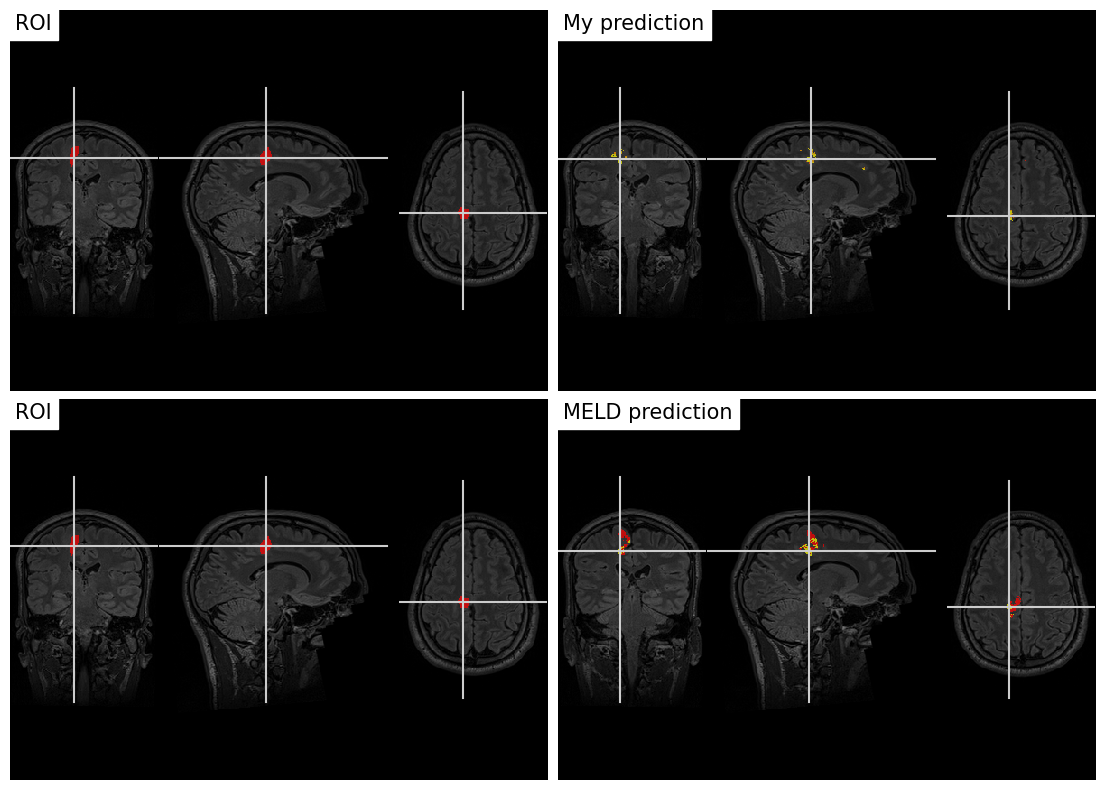

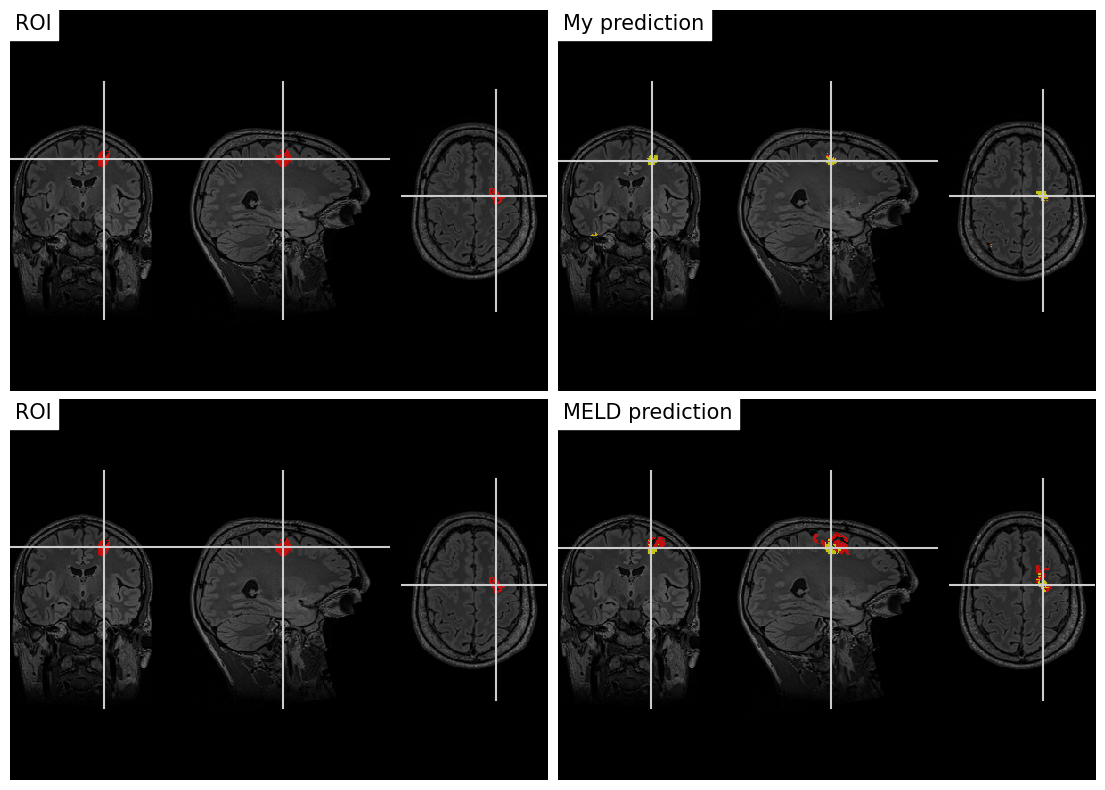

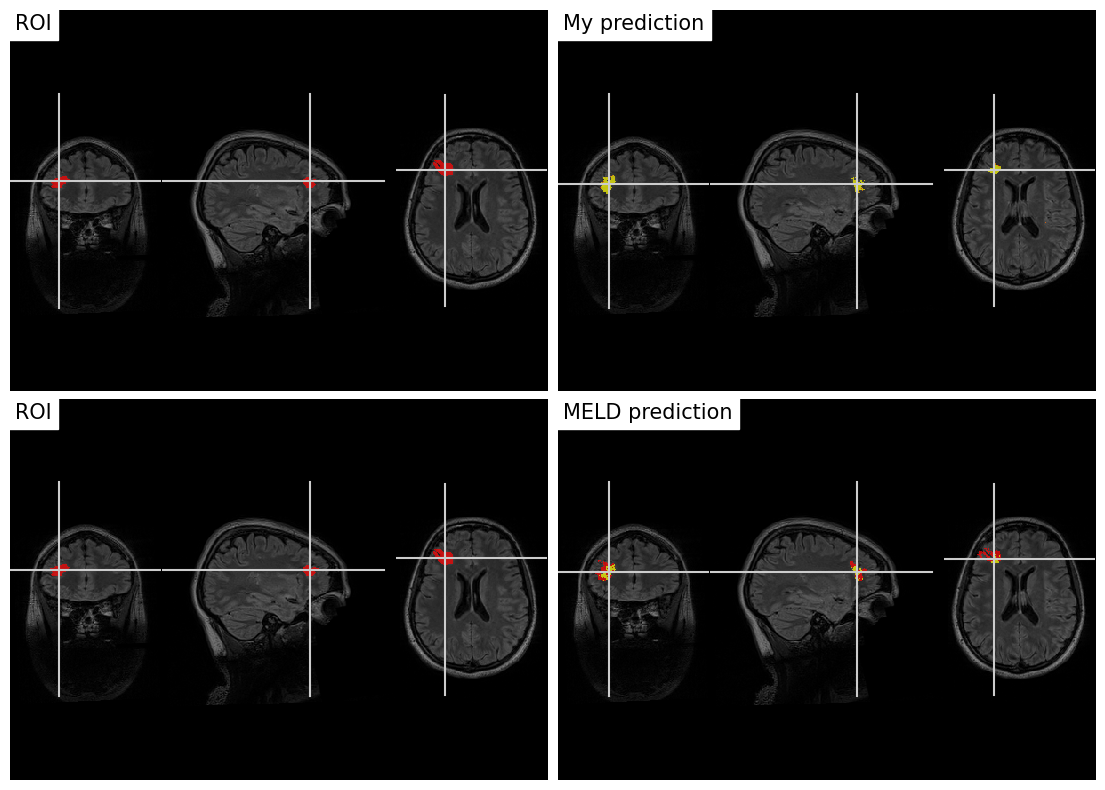

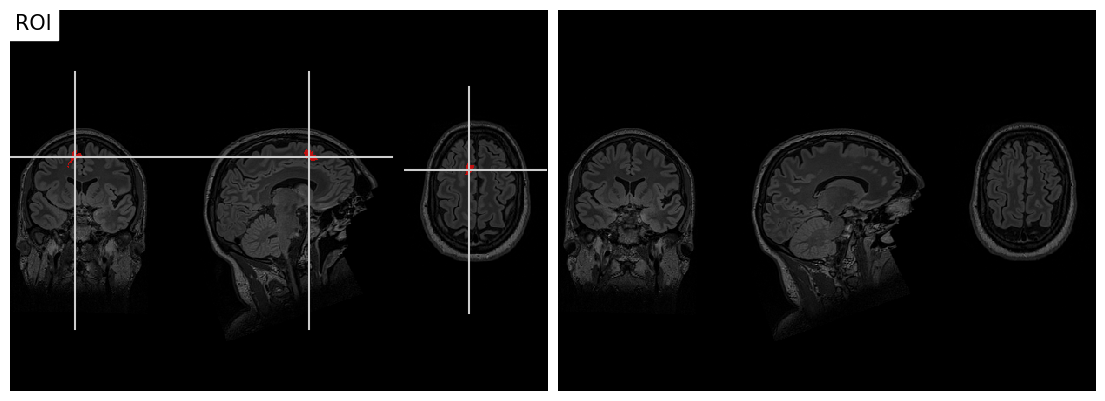

In [1]:
from nilearn import plotting
import matplotlib.pyplot as plt
import os

out_dir = './data/output/predictions_reports/comparisons_auto_rg'
os.makedirs(out_dir, exist_ok=True)

wanted = {
    'sub-00139', 'sub-00141', 'sub-00136', 'sub-00138', 'sub-00140', 'sub-00142', 'sub-00144', 'sub-00145', 'sub-00146'
}

for subj in wanted:

    pred_nii = f'/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports/{subj}/predictions/prediction_{subj}.nii.gz'
    meld_pred_nii = f'/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports/{subj}/predictions/prediction.nii.gz'
    if subj == 'sub-00140':
        roi    = f'/home/s17gmikh/FCD-Detection/meld_graph/data/input/{subj}/anat/{subj}_acq-tse3dvfl_FLAIR_roi.nii.gz'
        bg_nii = f'/home/s17gmikh/FCD-Detection/meld_graph/data/input/{subj}/anat/{subj}_acq-tse3dvfl_FLAIR.nii.gz'
    elif subj == 'sub-00139':
        roi    = f'/home/s17gmikh/FCD-Detection/meld_graph/data/input/{subj}/anat/{subj}_acq-tse3dvfl_FLAIR_roi.nii.gz'
        bg_nii = f'/home/s17gmikh/FCD-Detection/meld_graph/data/input/{subj}/anat/{subj}_acq-tse3dvfl_FLAIR.nii.gz'
    else:
        roi    = f'/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/{subj}/anat/{subj}_acq-T2sel_FLAIR_roi.nii.gz'
        bg_nii = f'/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds004199/{subj}/anat/{subj}_acq-T2sel_FLAIR.nii.gz'

    from matplotlib import gridspec
    # 1) Создаём фигуру и GridSpec-сетку
    fig = plt.figure(figsize=(14, 10))
    gs  = gridspec.GridSpec(
        2, 2,
        figure=fig,
        wspace=0.02,  # горизонтальные отступы
        hspace=0.02   # вертикальные отступы
    )

    # 2) Рисуем каждую ячейку
    ax0 = fig.add_subplot(gs[0, 0])
    plotting.plot_roi(
        roi, bg_img=bg_nii, axes=ax0,
        display_mode='ortho',
        title='ROI', cmap='autumn', annotate=False
    )

    ax1 = fig.add_subplot(gs[0, 1])
    plotting.plot_roi(
        pred_nii, bg_img=bg_nii, axes=ax1,
        display_mode='ortho',
        title='My prediction', cmap='autumn', annotate=False
    )

    ax2 = fig.add_subplot(gs[1, 0])
    plotting.plot_roi(
        roi, bg_img=bg_nii, axes=ax2,
        display_mode='ortho',
        title='ROI', cmap='autumn', annotate=False
    )

    ax3 = fig.add_subplot(gs[1, 1])
    plotting.plot_roi(
        meld_pred_nii, bg_img=bg_nii, axes=ax3,
        display_mode='ortho',
        title='MELD prediction', cmap='autumn', annotate=False
    )

    # 3) Пустая ячейка
    ax3 = fig.add_subplot(gs[1,1])
    ax3.axis('off')

    plt.savefig(os.path.join(out_dir, f'{subj}.png'))
# fig, axes = plt.subplots(2, 1, figsize=(5, 5), constrained_layout=True)

# first row: ROI vs. your pred
# plotting.plot_roi(roi,      bg_img=bg_nii, display_mode='ortho',
#                   title="ROI",              cmap='autumn', axes=axes[0])
# plotting.plot_roi(pred_nii, bg_img=bg_nii, display_mode='ortho',
#                   title="My prediction",     cmap='autumn', axes=axes[1])

# plotting.plot_roi(roi,      bg_img=bg_nii, display_mode='ortho',
#                   title="ROI",              cmap='autumn', axes=axes[1,0])
# # second row: MELD pred vs. (empty)
# plotting.plot_roi(meld_pred_nii, bg_img=bg_nii, display_mode='ortho',
#                   title="MELD prediction", cmap='autumn', axes=axes[1,1])
# axes[1,1].axis('off')  # turn the unused slot off

# plt.show()

In [37]:
import pandas as pd
import plotly.graph_objects as go

# 1) Собираем DataFrame
data = [
    {"method": "Only Hemisphere", "dec_removed": 0, "DICE": 0.310},
    {"method": "Only Hemisphere", "dec_removed": 1, "DICE": 0.301},
    {"method": "Only Hemisphere", "dec_removed": 2, "DICE": 0.276},
    {"method": "Only Hemisphere", "dec_removed": 3, "DICE": 0.275},
    {"method": "Hemisphere + Lobe", "dec_removed": 0, "DICE": 0.285},
    {"method": "Hemisphere + Lobe", "dec_removed": 1, "DICE": 0.297},
    {"method": "Hemisphere + Lobe", "dec_removed": 2, "DICE": 0.333},
    {"method": "Hemisphere + Lobe", "dec_removed": 3, "DICE": 0.280},
    {"method": "From Atlas", "dec_removed": 0, "DICE": 0.269},
    {"method": "From Atlas", "dec_removed": 1, "DICE": 0.298},
    {"method": "From Atlas", "dec_removed": 2, "DICE": 0.342},
    {"method": "From Atlas", "dec_removed": 3, "DICE": 0.343},
    {"method": "From AutoRG-Brain", "dec_removed": 0, "DICE": 0.279},
    {"method": "From AutoRG-Brain", "dec_removed": 1, "DICE": 0.299},
]
df = pd.DataFrame(data)

# 2) Переводим категории методов в числа + готовим отображение
methods = df["method"].unique().tolist()
df["method_code"] = df["method"].apply(lambda x: methods.index(x))

# 3) Строим Parcoords
fig = go.Figure(
    data=go.Parcoords(
        line=dict(color=df["DICE"], colorscale='Rainbow', showscale=True),
        dimensions=[
            dict(
                label="Method",
                values=df["method_code"],
                tickvals=list(range(len(methods))),
                ticktext=methods
            ),
            dict(
                label="Decoders removed",
                values=df["dec_removed"]
            ),
            dict(
                label="Median DICE",
                values=df["DICE"]
            )
        ]
    )
)

# 4) Убираем числовые метки с осей
fig.update_layout(
    margin=dict(l=120, r=50, t=50, b=50),
    xaxis=dict(showticklabels=False),  # Убираем цифры на оси X
    yaxis=dict(showticklabels=False)   # Убираем цифры на оси Y
)

fig.show()

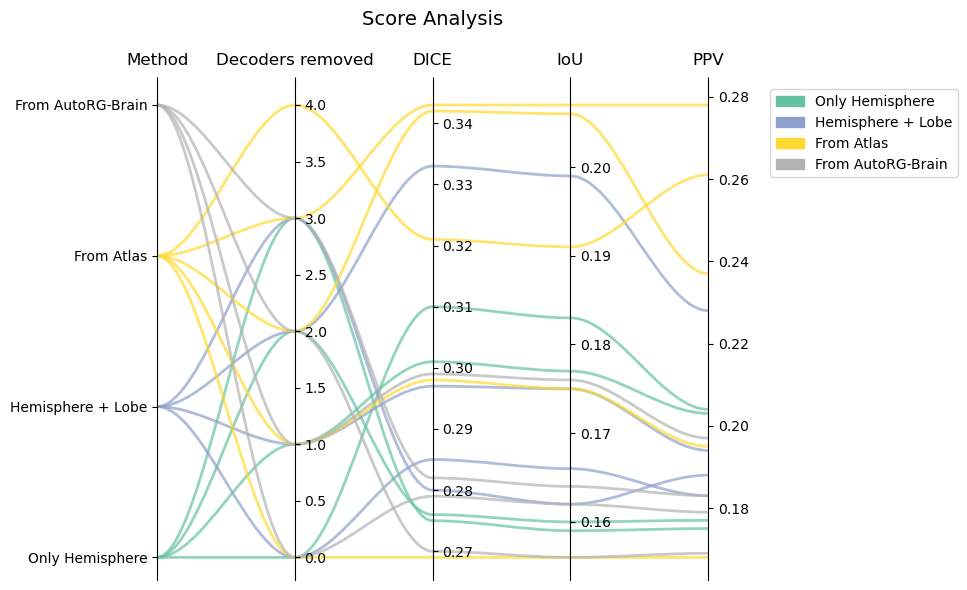

In [5]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
import pandas as pd

# Ваши данные
data = [
    # Table 1
    {"method": "Only Hemisphere", "dec_removed": 0, "DICE": 0.310, "IoU": 0.183, "PPV": 0.204},
    {"method": "Only Hemisphere", "dec_removed": 1, "DICE": 0.301, "IoU": 0.177, "PPV": 0.203},
    {"method": "Only Hemisphere", "dec_removed": 2, "DICE": 0.276, "IoU": 0.160, "PPV": 0.177},
    {"method": "Only Hemisphere", "dec_removed": 3, "DICE": 0.275, "IoU": 0.159, "PPV": 0.175},
    {"method": "Hemisphere + Lobe", "dec_removed": 0, "DICE": 0.285, "IoU": 0.166, "PPV": 0.183},
    {"method": "Hemisphere + Lobe", "dec_removed": 1, "DICE": 0.297, "IoU": 0.175, "PPV": 0.194},
    {"method": "Hemisphere + Lobe", "dec_removed": 2, "DICE": 0.333, "IoU": 0.199, "PPV": 0.228},
    {"method": "Hemisphere + Lobe", "dec_removed": 3, "DICE": 0.280, "IoU": 0.162, "PPV": 0.188},
    # Table 2
    {"method": "From Atlas", "dec_removed": 0, "DICE": 0.269, "IoU": 0.156, "PPV": 0.168},
    {"method": "From Atlas", "dec_removed": 1, "DICE": 0.298, "IoU": 0.175, "PPV": 0.195},
    {"method": "From Atlas", "dec_removed": 2, "DICE": 0.342, "IoU": 0.206, "PPV": 0.237},
    {"method": "From Atlas", "dec_removed": 3, "DICE": 0.343, "IoU": 0.207, "PPV": 0.278},
    {"method": "From Atlas", "dec_removed": 4, "DICE": 0.321, "IoU": 0.191, "PPV": 0.261},
    {"method": "From AutoRG-Brain", "dec_removed": 0, "DICE": 0.279, "IoU": 0.162, "PPV": 0.179},
    {"method": "From AutoRG-Brain", "dec_removed": 1, "DICE": 0.299, "IoU": 0.176, "PPV": 0.197},
    {"method": "From AutoRG-Brain", "dec_removed": 2, "DICE": 0.270, "IoU": 0.156, "PPV": 0.169},
    {"method": "From AutoRG-Brain", "dec_removed": 3, "DICE": 0.282, "IoU": 0.164, "PPV": 0.183},
]

df = pd.DataFrame(data)

# Преобразуем категориальные данные в числовые
methods = df["method"].unique()
method_to_num = {method: i for i, method in enumerate(methods)}
df["method_num"] = df["method"].map(method_to_num)

# Подготовка данных для параллельных координат
ynames = ["Method", "Decoders removed", "DICE", "IoU", "PPV"]
ys = df[["method_num", "dec_removed", "DICE", "IoU", "PPV"]].values

# Нормализация данных
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # Добавляем 5% отступа
ymaxs += dys * 0.05
dys = ymaxs - ymins

# Создаем фигуру
fig, host = plt.subplots(figsize=(10, 6))

# Настройка осей
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=12)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Score Analysis', fontsize=14, pad=20)

# Цвета для каждого метода
colors = plt.cm.Set2(np.linspace(0, 1, len(methods)))
host.set_yticks(range(len(methods)))
host.set_yticklabels(methods)  # Это подпишет названия методов слева

# Рисуем кривые Безье для каждой строки данных
for idx, row in df.iterrows():
    # Нормализуем значения
    zs = [row["method_num"], row["dec_removed"], row["DICE"], row["IoU"], row["PPV"]]
    zs[1:] = (zs[1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]
    
    # Создаем контрольные точки для кривых Безье
    verts = list(zip([x for x in np.linspace(0, len(ys[0]) - 1, len(ys[0]) * 3 - 2, endpoint=True)],
                     np.repeat(zs, 3)[1:-1]))
    
    # Создаем путь и патч
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    color = colors[method_to_num[row["method"]]]
    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor=color, alpha=0.7)
    host.add_patch(patch)

# Добавляем легенду
patches_list = [patches.Patch(color=colors[i], label=method) for i, method in enumerate(methods)]
plt.legend(handles=patches_list, bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

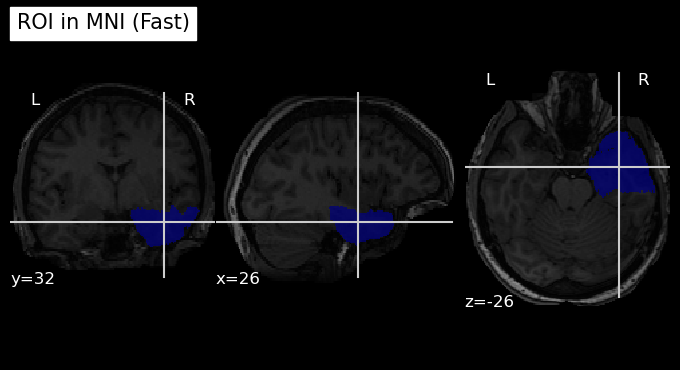

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting


plotting.plot_roi(
    roi_img="/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds005602/masks/2/2_MaskInRawData.nii.gz",
    bg_img="/home/s17gmikh/FCD-Detection/meld_graph/data/input/ds005602/sub-2/anat/sub-2_T1w.nii.gz",
    title="ROI in MNI (Fast)",
    display_mode='ortho',
    # cut_coords=(-44, 3, -13),
    # threshold=0.5
)